In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
sns.set(rc = {'figure.figsize':(30, 16)})
data = pd.read_csv('export.csv')

In [3]:
data = data[data['X'] >= 0]
data = data[data['Y'] >= 0]
data = data[data['X'] <= 4225]
data = data[data['Y'] <= 1560]

data = data[['X', 'Y', 'Eye movement type', 'Recording timestamp']]

data['PREV_X'] = data['X'].shift(1)
data['PREV_Y'] = data['X'].shift(1)
data['TIME'] = data['Recording timestamp']
data['PREV_TIME'] = data['TIME'].shift(1)

Y = data['Eye movement type']

In [4]:
dy = np.diff(data['TIME'])
dxX = np.diff(data['X'])
dxY = np.diff(data['Y'])

data.drop(0, inplace=True)
data['SPEED_DIFF_X'] = dxX / dy
data['SPEED_DIFF_Y'] = dxY / dy

data = data[data['Eye movement type'] != 'Unclassified']
data = data.head(10000)

<AxesSubplot:xlabel='TIME', ylabel='SPEED_DIFF_X'>

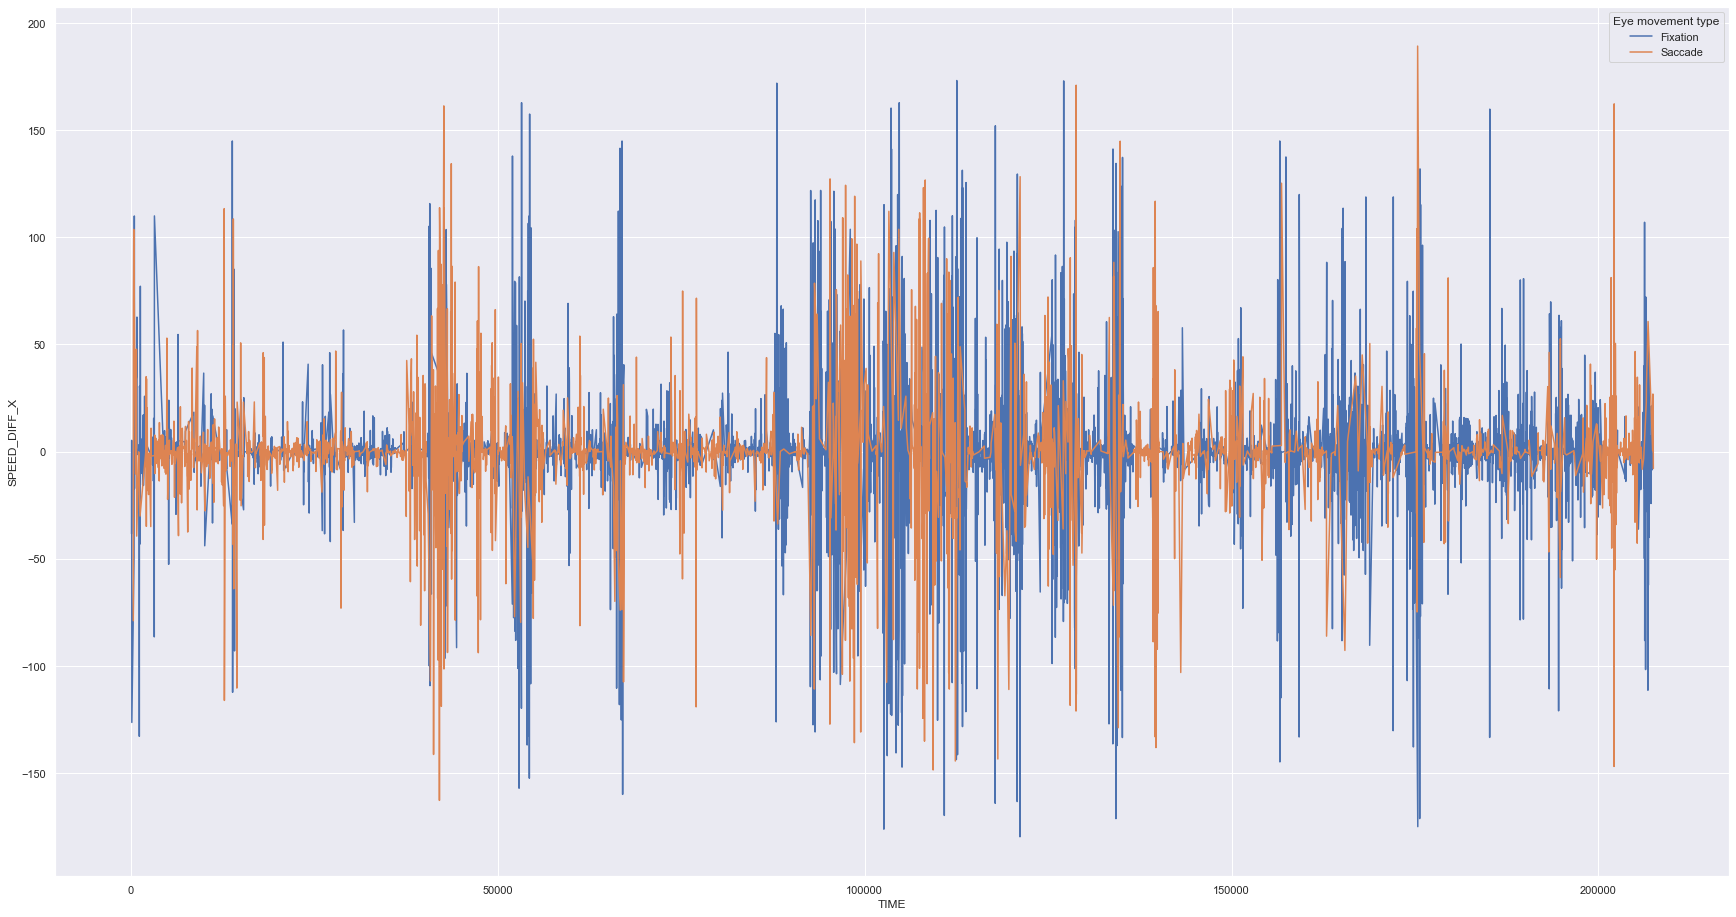

In [5]:

sns.lineplot(x=data['TIME'], y=data['SPEED_DIFF_X'], hue=data['Eye movement type'])

<AxesSubplot:xlabel='TIME', ylabel='SPEED_DIFF_Y'>

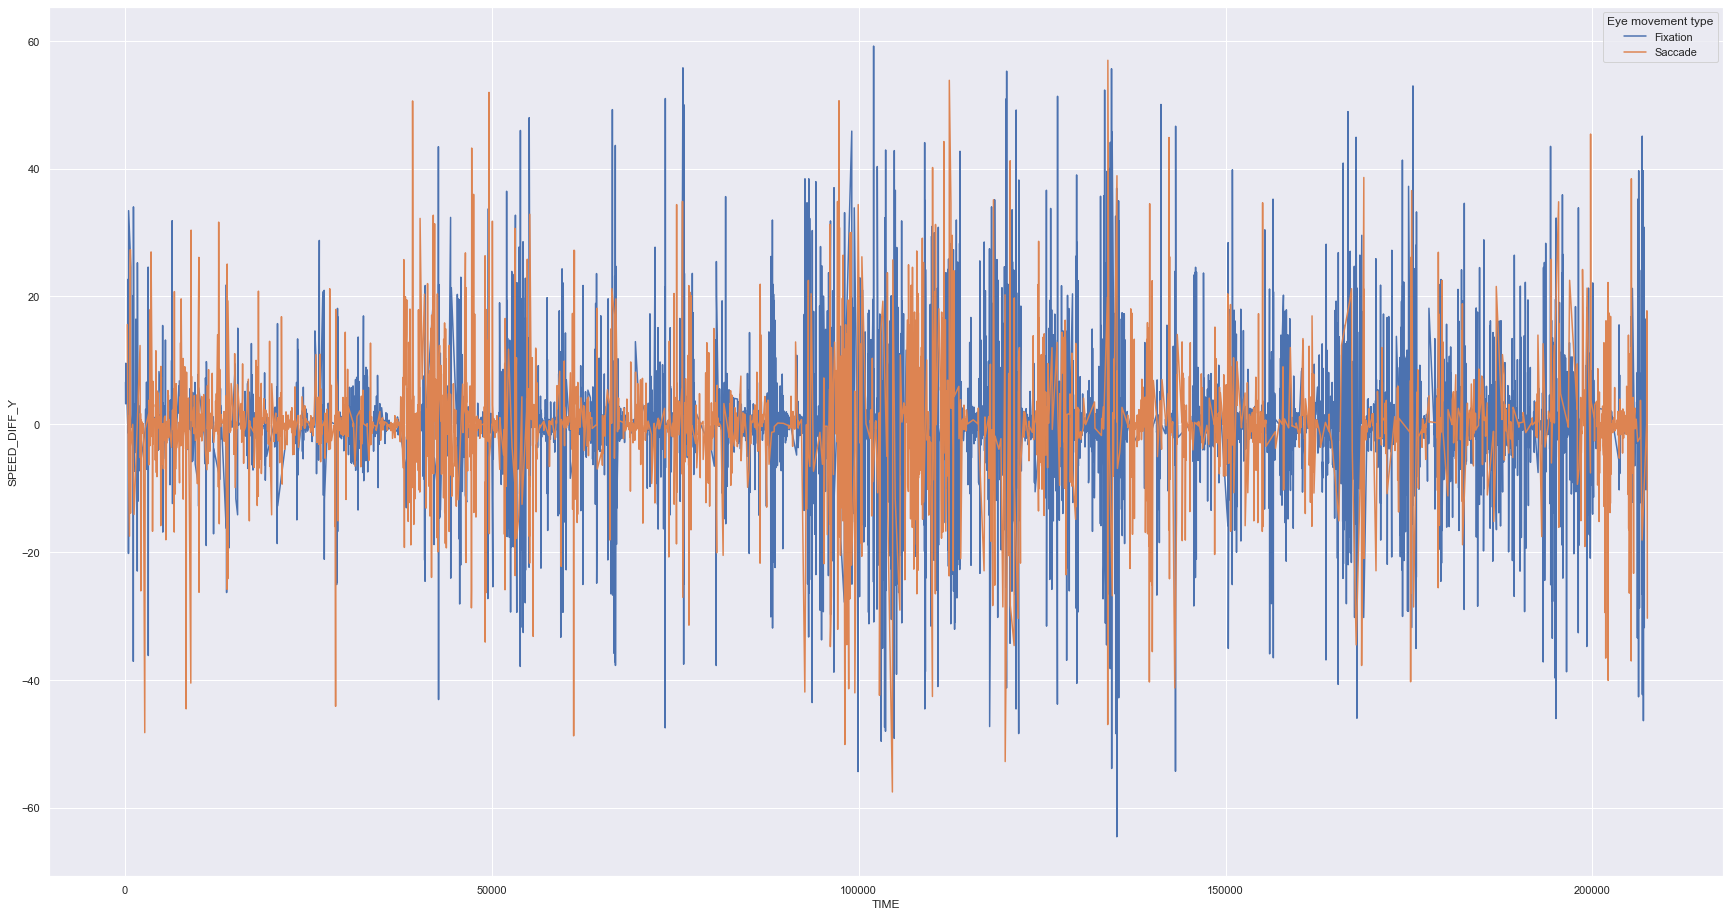

In [6]:
sns.lineplot(x=data['TIME'], y=data['SPEED_DIFF_Y'], hue=data['Eye movement type'])

In [7]:
data['Eye movement type'] = data['Eye movement type'].replace('Fixation', 1)
data['Eye movement type'] = data['Eye movement type'].replace('Saccade', 0)

In [8]:
X = data[['X', 'Y', 'SPEED_DIFF_X', 'SPEED_DIFF_Y', 'PREV_X', 'PREV_Y']]
Y = data['Eye movement type']

In [9]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [10]:
X_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [11]:
regr = LogisticRegression()
regr.fit(X_train, y_train)

LogisticRegression()

In [12]:
score = regr.score(x_test, y_test)

In [13]:
score

0.6397240019714144

<AxesSubplot:xlabel='SPEED_DIFF_X', ylabel='SPEED_DIFF_Y'>

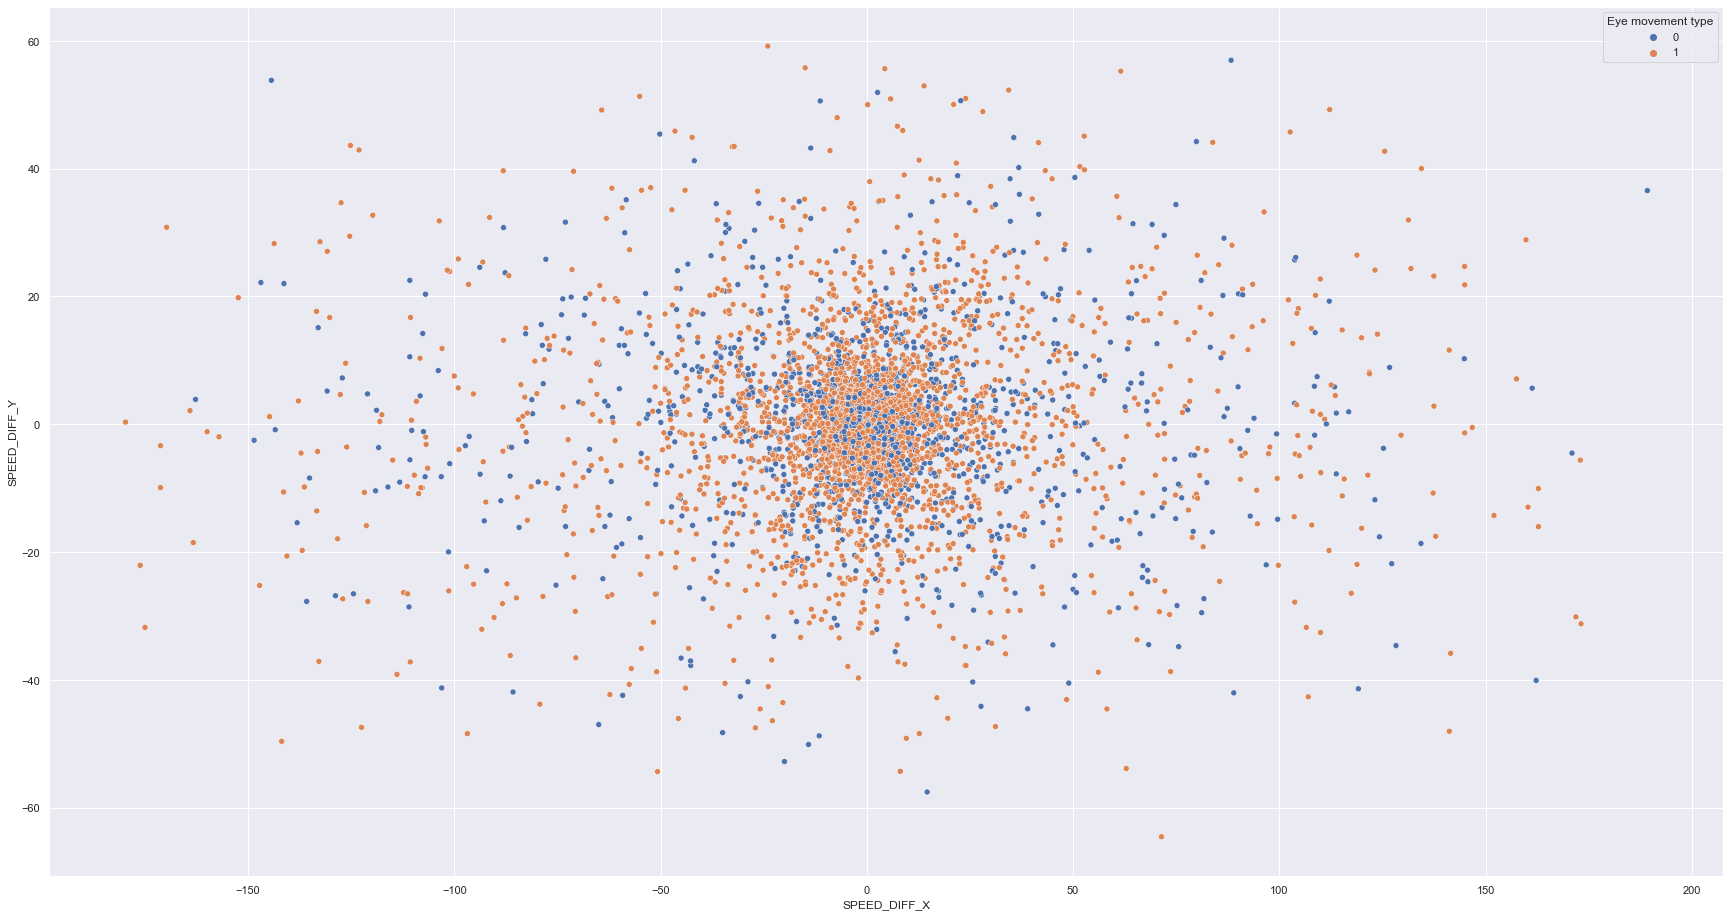

In [15]:
sns.scatterplot(x=data['SPEED_DIFF_X'], y=data['SPEED_DIFF_Y'], hue=data['Eye movement type'])